### 6장 비지도 학습(unsupervised learning)
#### > 06-1 군집 알고리즘
#### - keyword: 비지도학습, 히스토그램, 군집

In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-09 21:31:23--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-09 21:31:24--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-09 21:31:26--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 넘파이에서 npy 파일 로드 
fruits = np.load('fruits_300.npy')

In [6]:
# 파일의 배열 크기 확인
print(fruits.shape)

# 첫번째 차원 (300) : 샘플의 개수
# 두번째 차원 (100) : 이미지 높이
# 세번째 차원 (100) : 이미지 너비
# 이미지 크기 = 100 x 100 

(300, 100, 100)


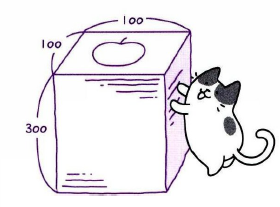

In [7]:
# 첫 번째 이미지의 첫 번째 행 출력 
# 3차원 이미지임으로 처음 2개 인덱스 0으로 지정, 마지막 인덱스는 지정x
# 1번째 샘플의 1번째 높이의 전체 이미지 너비 

print(fruits[0,0,:])

# 첫번째 행에 있는 픽셀 100개 출력
# 0~255의 정숫값 

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


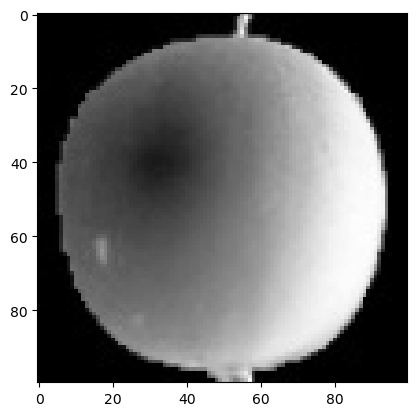

In [8]:
# # fruits 이미지의 첫번째 행 출력
# 맷플로립의 imshow() 함수 사용, cmap을 gray로 적용하여 흑백적용 

plt.imshow(fruits[0], cmap='gray')
plt.show()

# 어두운 부분이 0에 가깝고 밝은 부분이 255에 가까움
# 픽셀값이 0이면 곱셈, 덧셈하면 출력이 0이 되기 때문
# 바탕을 검게 만들고, 사과를 밝은색으로 만들어 흑백 사진을 반전시켜 사용

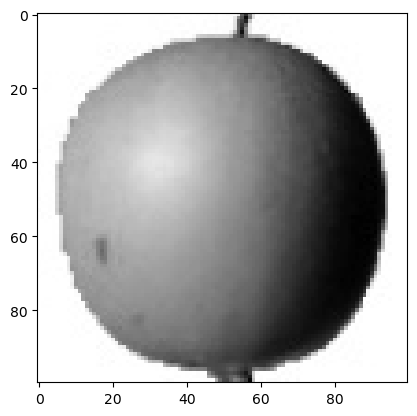

In [9]:
# cmap을 gray_r로 지정하여 다시 반전

plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

# 이 그림에선 밝은 부분이 0에 가깝고 짙은 부분이 255애 가까움


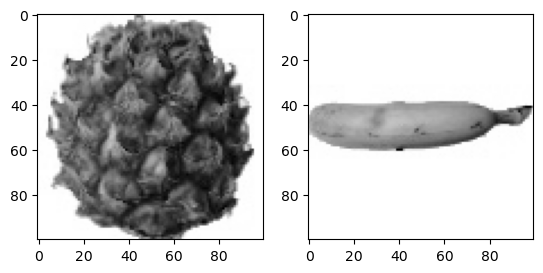

In [10]:
# 맷플로립 subplot()
# - 여러개의 그래프를 배열처럼 쌓을 수 있음
# - subplot(0,0): 두 매개변수는 그래프르 쌓을 행과 열을 지정
# - ex)subplot(1,2): 하나의 행과 2개의 열을 지정
# axs: 2개의 서브 그래프를 담고 있는 배열

fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap= 'gray_r')
axs[1].imshow(fruits[200], cmap= 'gray_r')
plt.show()

#### 픽셀값 분석하기

In [11]:
# 배열을 1차원 배열로 변경 -> 이미지 출력은 어렵지만 배열 계산에 편리
# reshape() method를 사용해 두번째 차원과 세번째 차원을 10,000으로 합침, 첫번째 차원을 -1로 지정하면 자동으로 남은 차원 할당

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [12]:
# 배열크기확인

print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


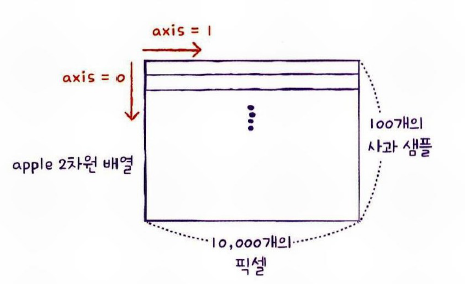

In [13]:
#각 샘플이 평균값 계산(사과1, 사과2 ...사과100의 평균)
# mean() method로 평균계산

print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


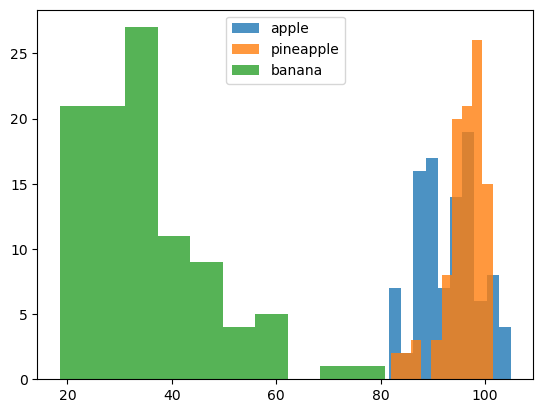

In [ ]:
# 사과, 파인애플, 바나나 각 샘플의 히스토그램 그리기
# alpha값을 1보다 작게 설정해서 투명도를 높임

plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()
plt.show()

# 바나나는 40이 이하에 집중
# 파인애플이랑 사과는 90-100사이에 집중
# 바나나는 파인애플과 사과와 샘플평균으로 구분가능


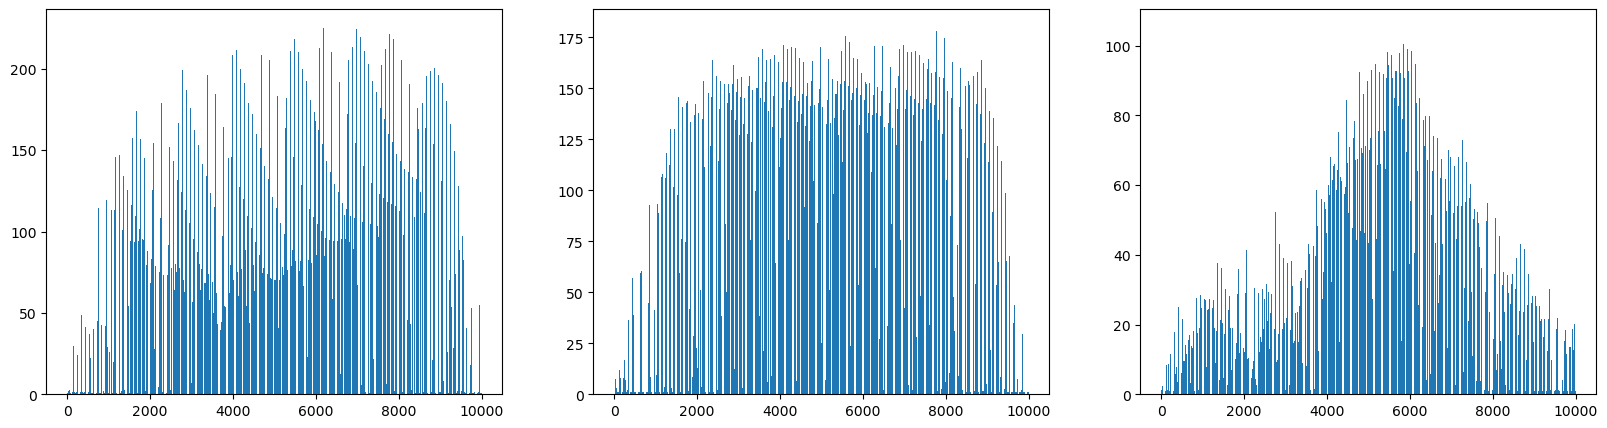

In [ ]:
# 샘플평균이 아닌 픽셀평균으로 히스토그램 그리기 
# bar()함수 이용: 픽셀 10000개에 대한 평균값을 막대 그래프로 

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),apple.mean(axis=0))
axs[1].bar(range(10000),pineapple.mean(axis=0))
axs[2].bar(range(10000),banana.mean(axis=0))
plt.show()

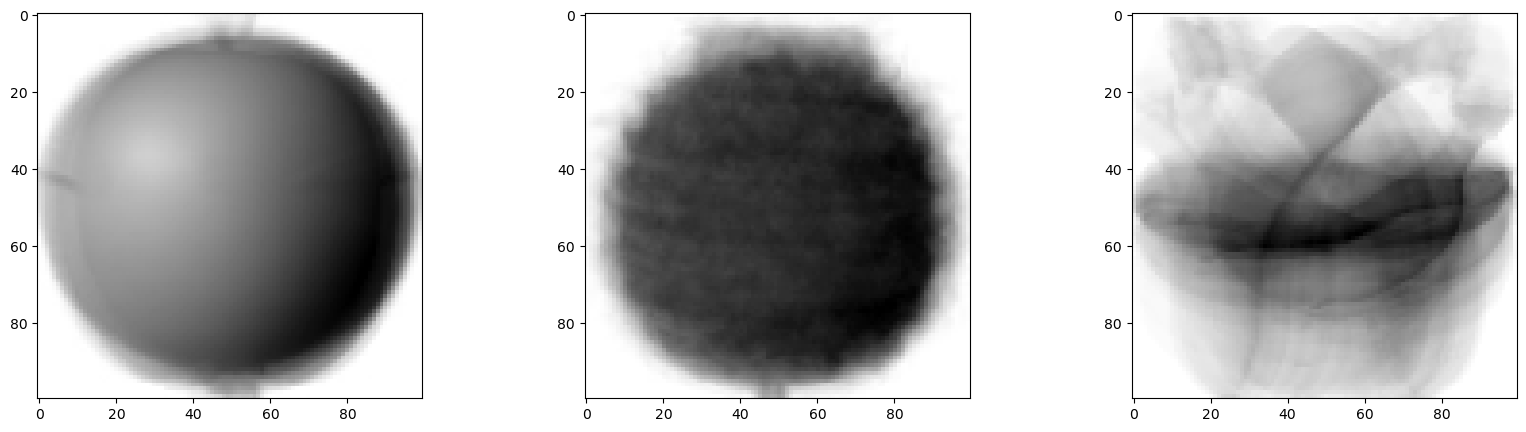

In [ ]:
# 픽셀 평균값을 100x100 크기로 바꿔서 이미지처럼 출력

apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

#### 평균값과 가까운 사진 고르기

In [ ]:
# fruits 배열에 있는 모든 샘플에서 apple_mean을 밴 절대값의 평균계산
# abs() : 절대값 계산 ex) np.abs(-1) -> 1 반환 
# abs_diff는 (300, 100, 100) 크기의 배열

abs_diff= np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

# abs_mean은 각 샘플의 오차평균이므로 크기가 (300,) 인 1차원 배열

(300,)


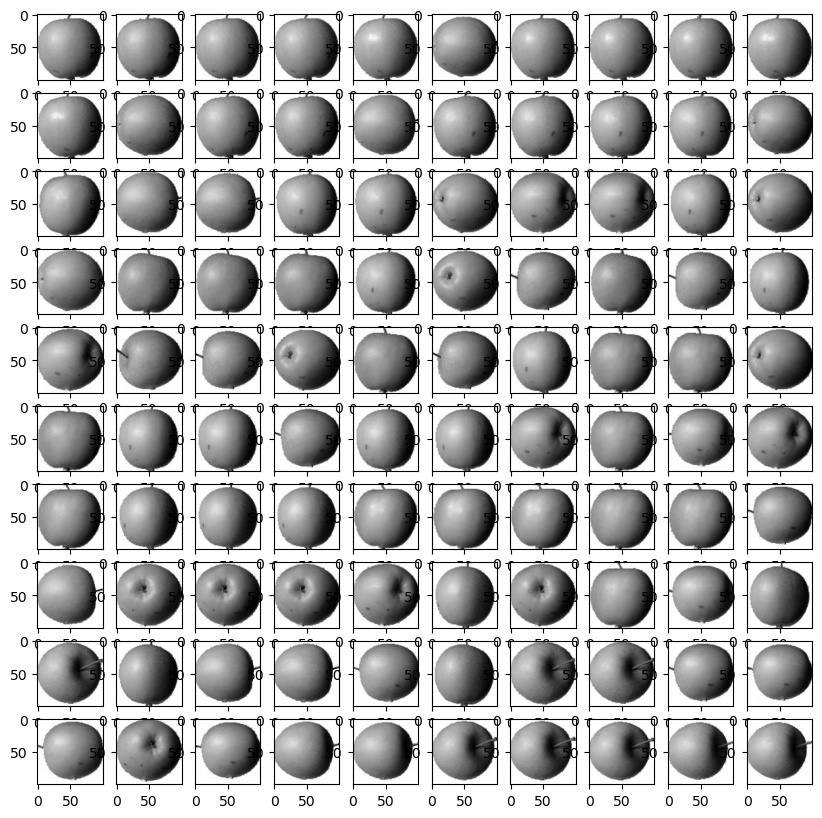

In [ ]:
# abs_mean과 오차가 가장 작은 순서대로 100개 고르기 
# np.argsort(): 함수를 작은 것에서 큰 순서대로 나열

apple_index=np.argsort(abs_mean)[:100]                 # abs_mean값이 작은 것 부터 순서대로 100개 고름
apple_index = apple_index.reshape(10,10)               
fig, axs = plt.subplots (10, 10, figsize =(10,10))     # 10x10, 총 100개의 서브 그래프 만들기, 맷플로립 기본 figsize는 (8,6)
for i in range(10):                                    # 2중 for 반복문을 순회하면서 10개의 행과 열에 이미지 출력
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i,j]], cmap='gray_r')
        axs[i,j].axis('on')                           # axis('off'): x, y 좌표표시 제거
plt.show()